<a href="https://colab.research.google.com/github/Carlosrnes/deep_learning_nova/blob/main/CNN/CNN_Fine_Tuning_Transfer_Learning_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### GPU

https://colab.research.google.com/notebooks/gpu.ipynb

In [1]:
!nvidia-smi

Wed Mar 30 18:13:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### How to Load Kaggle Datasets Directly into Google Colab?

https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/ 

In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# Download data
! kaggle datasets download -d kmader/food41

100% 5.30G/5.30G [00:28<00:00, 214MB/s]
100% 5.30G/5.30G [00:28<00:00, 200MB/s]


### Libraries

In [3]:
import os, shutil
import numpy as np
import datetime
import zipfile

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import Image, display

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing import image

###  Get Data

In [4]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("food41.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [5]:
# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("images"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 101 directories and 0 images in 'images'.
There are 0 directories and 1000 images in 'images/chicken_wings'.
There are 0 directories and 1000 images in 'images/seaweed_salad'.
There are 0 directories and 1000 images in 'images/omelette'.
There are 0 directories and 1000 images in 'images/escargots'.
There are 0 directories and 1000 images in 'images/greek_salad'.
There are 0 directories and 1000 images in 'images/cannoli'.
There are 0 directories and 1000 images in 'images/fried_calamari'.
There are 0 directories and 1000 images in 'images/clam_chowder'.
There are 0 directories and 1000 images in 'images/apple_pie'.
There are 0 directories and 1000 images in 'images/deviled_eggs'.
There are 0 directories and 1000 images in 'images/pancakes'.
There are 0 directories and 1000 images in 'images/guacamole'.
There are 0 directories and 1000 images in 'images/bruschetta'.
There are 0 directories and 1000 images in 'images/french_onion_soup'.
There are 0 directories and 1000 images 

In [6]:
# select the directory of the images (divided by class folder) - without data augmentation
data_folder = '/content/images'

list_class = os.listdir(data_folder)
list_class.sort()


print(f'{len(list_class)} Classes of foods.')
print(list_class)

101 Classes of foods.
['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese',

### Data Preprocessing

In [7]:
# Set the seed
tf.random.set_seed(42)

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

# rescale the Image and split into validation set
#datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

# train set - generation
train_generator = tf.keras.preprocessing.image_dataset_from_directory(data_folder,
                                         image_size = IMAGE_SHAPE,
                                         batch_size = BATCH_SIZE,
                                         validation_split = 0.2,
                                         label_mode = 'categorical',
                                         seed=42,
                                         subset = 'training')

val_generator = tf.keras.preprocessing.image_dataset_from_directory(data_folder,
                                      image_size = IMAGE_SHAPE,
                                      batch_size = BATCH_SIZE,
                                      validation_split = 0.2,
                                      label_mode = 'categorical',
                                      seed=42,
                                      subset = 'validation')

Found 101000 files belonging to 101 classes.
Using 80800 files for training.
Found 101000 files belonging to 101 classes.
Using 20200 files for validation.


In [8]:
# Sanity Check
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 224, 224, 3)
labels batch shape: (32, 101)


### Creating a callback

In [9]:
# Create tensorboard callback (functionized because need to create a new one for each model)
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

### Plot function

In [14]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

### Model 1 - Feature extraction with data augmentation 

In [10]:
# Create a functional model based on EfficientNetB0 with data augmentation

# Build data augmentation layer
data_augmentation = Sequential([
  preprocessing.RandomFlip('horizontal'),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNet                 
], name="data_augmentation")

# Setup the input shape to our model
input_shape = (224, 224, 3)

# Create a frozen base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input and output layers
inputs = layers.Input(shape=input_shape, name="input_layer") # create input layer
x = data_augmentation(inputs) # augment our training images
x = base_model(x, training=False) # pass augmented images to base model but keep it in inference mode, so batchnorm layers don't get updated: https://keras.io/guides/transfer_learning/#build-a-model 
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(101, activation="softmax", name="output_layer")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

16719872/16705208 [==============================] - 0s 0us/step


In [11]:
# Setup checkpoint path
checkpoint_path = "model_checkpoints_weights/checkpoint.ckpt" # note: Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=False, # set to True to save only the best model instead of a model every epoch 
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [12]:
# Fit the model saving checkpoints every epoch
initial_epochs = 5
feature_extraction_data_aug = model_1.fit(train_generator,
                                          epochs=initial_epochs,
                                          validation_data=val_generator,
                                          validation_steps=len(val_generator),
                                          callbacks=[create_tensorboard_callback("transfer_learning", "model_data_aug"), 
                                          checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/model_data_aug/20220330-181519
Epoch 1/5
2525/2525 [==============================] - ETA: 0s - loss: 2.1684 - accuracy: 0.4726
Epoch 1: saving model to model_checkpoints_weights/checkpoint.ckpt
2525/2525 [==============================] - 780s 301ms/step - loss: 2.1684 - accuracy: 0.4726 - val_loss: 1.5781 - val_accuracy: 0.5903
Epoch 2/5
2525/2525 [==============================] - ETA: 0s - loss: 1.6963 - accuracy: 0.5678
Epoch 2: saving model to model_checkpoints_weights/checkpoint.ckpt
2525/2525 [==============================] - 548s 217ms/step - loss: 1.6963 - accuracy: 0.5678 - val_loss: 1.4740 - val_accuracy: 0.6150
Epoch 3/5
2525/2525 [==============================] - ETA: 0s - loss: 1.5811 - accuracy: 0.5933
Epoch 3: saving model to model_checkpoints_weights/checkpoint.ckpt
2525/2525 [==============================] - 501s 198ms/step - loss: 1.5811 - accuracy: 0.5933 - val_loss: 1.4392 - val_accuracy: 0.6241
Epoch 4/5
2525/

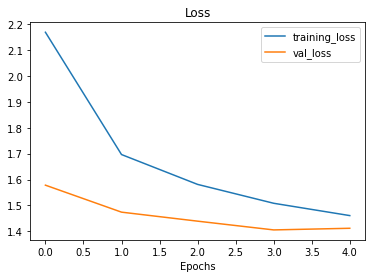

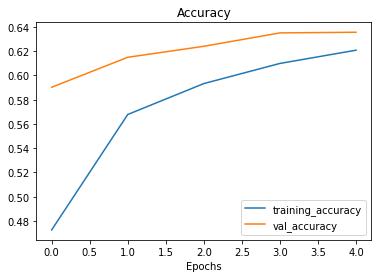

In [16]:
# Plot model loss curves
plot_loss_curves(feature_extraction_data_aug)

In [17]:
# Load in saved model weights and evaluate model
model_1.load_weights(checkpoint_path)
loaded_weights_model_results = model_1.evaluate(val_generator)

632/632 [==============================] - 85s 134ms/step - loss: 1.4117 - accuracy: 0.6356


In [18]:
# Layers in loaded model
model_1.layers

In [19]:
for layer in model_1.layers:
  print(layer.trainable)

True
True
False
True
True


In [20]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

### Model 2 feature extracting and fine tuning with data augmentation

In [21]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile the model (always recompile after any adjustments to a model)
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # learning rate is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [22]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [23]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
model_fine_data_aug = model_1.fit(train_generator,
                                  epochs=fine_tune_epochs,
                                  validation_data=val_generator,
                                  initial_epoch=feature_extraction_data_aug.epoch[-1], # start from previous last epoch
                                  validation_steps=len(val_generator),
                                  callbacks=[create_tensorboard_callback("transfer_learning", "fine_tune_feature_extracting")]) # name experiment appropriately


Saving TensorBoard log files to: transfer_learning/fine_tune_feature_extracting/20220330-190357
Epoch 5/10
2525/2525 [==============================] - 480s 186ms/step - loss: 1.3289 - accuracy: 0.6511 - val_loss: 1.3199 - val_accuracy: 0.6608
Epoch 6/10
2525/2525 [==============================] - 463s 183ms/step - loss: 1.2172 - accuracy: 0.6777 - val_loss: 1.2764 - val_accuracy: 0.6721
Epoch 7/10
2525/2525 [==============================] - 459s 182ms/step - loss: 1.1477 - accuracy: 0.6923 - val_loss: 1.2739 - val_accuracy: 0.6728
Epoch 8/10
2525/2525 [==============================] - 458s 181ms/step - loss: 1.0874 - accuracy: 0.7070 - val_loss: 1.2524 - val_accuracy: 0.6786
Epoch 9/10
2525/2525 [==============================] - 457s 181ms/step - loss: 1.0406 - accuracy: 0.7191 - val_loss: 1.2375 - val_accuracy: 0.6834
Epoch 10/10
2525/2525 [==============================] - 453s 179ms/step - loss: 0.9966 - accuracy: 0.7278 - val_loss: 1.2409 - val_accuracy: 0.6847


In [24]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.4726485013961792, 0.5678341388702393, 0.5933291912078857, 0.6099257469177246, 0.6208415627479553, 0.6511138677597046, 0.6776856184005737, 0.6923143267631531, 0.7070420980453491, 0.7190718054771423, 0.727834165096283]


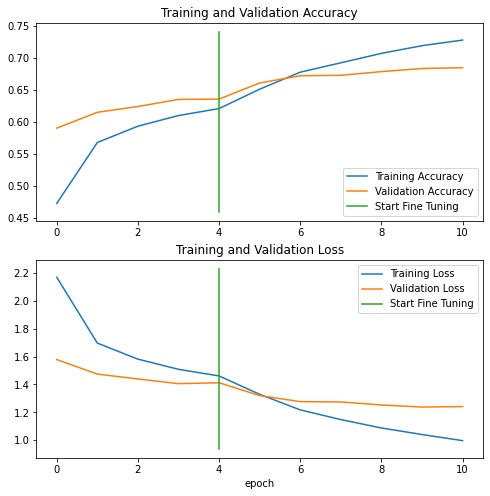

In [25]:
compare_historys(original_history=feature_extraction_data_aug, 
                 new_history=model_fine_data_aug, 
                 initial_epochs=5)